In [1]:
import pandas as pd
import numpy as np
grad=pd.read_csv("Grad_check2.csv")

In [2]:
grad.head()

,Serial No.,GRE_Score,TOEFL_Score,University Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
grad.tail()

,Serial No.,GRE_Score,TOEFL_Score,University Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
95,96,304,100,4,1.5,2.5,7.84,0,0.42
96,97,306,100,2,3.0,3.0,8.00,0,0.48
97,98,331,120,3,4.0,4.0,8.96,1,0.86
98,99,332,119,4,5.0,4.5,9.24,1,0.90
99,100,323,113,3,4.0,4.0,8.88,1,0.79


In [4]:
grad.shape

(100, 9)

In [5]:
grad=grad[["GRE_Score","CGPA","Chance_of_Admit"]]

In [6]:
grad.shape

(100, 3)

In [7]:
x1s=grad.GRE_Score
x2s=grad.CGPA
ys=grad.Chance_of_Admit
x1 = np.array(x1s)
x2 = np.array(x2s)
y  = np.array(ys)

In [8]:
n        = len(ys)
sum_x1   = np.sum(x1)
sum_x2   = np.sum(x2)
sum_y    = np.sum(y)
sum_x1y  = np.sum(x1*y)
sum_x2y  = np.sum(x2*y)
sum_x1x1 = np.sum(x1*x1)
sum_x2x2 = np.sum(x2*x2)
sum_x1x2 = np.sum(x1*x2)

n, sum_x1, sum_x2, sum_y, sum_x1y, sum_x2y, sum_x1x1, sum_x2x2 , sum_x1x2

(100,
 31783,
 852.32,
 68.25000000000001,
 21860.969999999998,
 591.7460000000001,
 10115989,
 7312.2644,
 271559.73)

In [9]:
# The system of normal equations
eqn1 = np.array([n, sum_x1, sum_x2, sum_y])
eqn2 = np.array([sum_x1, sum_x1x1, sum_x1x2, sum_x1y])
eqn3 = np.array([sum_x2, sum_x1x2, sum_x2x2, sum_x2y])
eqn1, eqn2, eqn3



(array([  100.  , 31783.  ,   852.32,    68.25]),
 array([   31783.  , 10115989.  ,   271559.73,    21860.97]),
 array([   852.32  , 271559.73  ,   7312.2644,    591.746 ]))

In [10]:
import numpy as np
a = np.array([[100.  , 31783.  ,   852.32], [31783.  , 10115989.  ,   271559.73], [ 852.32  , 271559.73  ,   7312.2644]])
b = np.array([68.25, 21860.97, 591.746])
x = np.linalg.solve(a, b)
print(x)

[-2.23964256  0.00568895  0.13070471]


In [11]:
β0 = x[0]
β1 = x[1]
β2 = x[2]  

In [21]:
def ChanceAdmit(β0, β1, β2, x1, x2):
    """
    Estimate the chance of admit.
    @param β0, β1, β2 the regression coefficients.
    @param x1 is GRE score
    @param x2 is CGPA
    @return the Chance of admit.
    """
    return β0 + β1*x1 + β2*x2

In [24]:
x1 = 334  # GRE score
x2 = 9  # CGPA

y_hat = ChanceAdmit(β0, β1, β2, x1, x2)
print(f'Estimated chance of admit for a student with {x1} Gre score and {x2} CGPA is {y_hat:,.2f}')

Estimated chance of admit for a student with 334 Gre score and 9 CGPA is 0.84


In [25]:
x1 = 334  # GRE score
x2 = 9.5  # CGPA

y_hat = ChanceAdmit(β0, β1, β2, x1, x2)
print(f'Estimated chance of admit for a student with {x1} Gre score and {x2} CGPA is {y_hat:,.2f}')

Estimated chance of admit for a student with 334 Gre score and 9.5 CGPA is 0.90


In [15]:
x=np.array(grad.GRE_Score)
y=np.array(grad.Chance_of_Admit)
import numpy as np

def calculate_slope_intercept(x_values, y_values):
    
    x = np.array(x_values)
    y = np.array(y_values)
    
    n = len(x)
    sum_x  = np.sum(x)
    sum_y  = np.sum(y)
    sum_xx = np.sum(x*x)
    sum_xy = np.sum(x*y)
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    
    numerator = sum_xy - (sum_x*sum_y)/n
    denominator = sum_xx - ((sum_x*sum_x)/n)
    
    m = numerator/denominator
    b = mean_y - m*mean_x
    
    return m, b  # slope and intercept

In [16]:
import matplotlib.pyplot as plt

def show_least_squares_line(title, x_label, y_label, 
                            x_values, y_values):
   
    # First show the scatter plot.
    plt.scatter(x_values, y_values)
    
    # Now show the least squares line.
    m, b = calculate_slope_intercept(x_values, y_values)
    reg_line = [m*x + b for x in x_values]  # regression line
    plt.plot(x, reg_line, color='red')

    plt.title(f'{title}, m = {m:.2f}, b = {b:.2f}')
    plt.ylabel(x_label)
    plt.xlabel(y_label)

    plt.show()

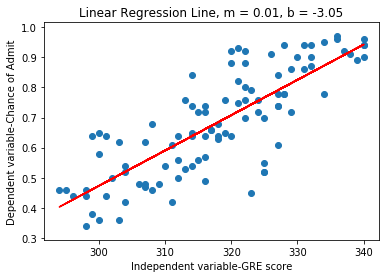

In [17]:
calculate_slope_intercept(x, y)
show_least_squares_line('Linear Regression Line', 'Dependent variable-Chance of Admit', 
                        'Independent variable-GRE score', x, y)

In [18]:
x=np.array(grad.CGPA)
y=np.array(grad.Chance_of_Admit)
import numpy as np

def calculate_slope_intercept(x_values, y_values):
    
    x = np.array(x_values)
    y = np.array(y_values)
    
    n = len(x)
    sum_x  = np.sum(x)
    sum_y  = np.sum(y)
    sum_xx = np.sum(x*x)
    sum_xy = np.sum(x*y)
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    
    numerator = sum_xy - (sum_x*sum_y)/n
    denominator = sum_xx - ((sum_x*sum_x)/n)
    
    m = numerator/denominator
    b = mean_y - m*mean_x
    
    return m, b  # slope and intercept

In [19]:
import matplotlib.pyplot as plt

def show_least_squares_line(title, x_label, y_label, 
                            x_values, y_values):
   
    # First show the scatter plot.
    plt.scatter(x_values, y_values)
    
    # Now show the least squares line.
    m, b = calculate_slope_intercept(x_values, y_values)
    reg_line = [m*x + b for x in x_values]  # regression line
    plt.plot(x, reg_line, color='red')

    plt.title(f'{title}, m = {m:.2f}, b = {b:.2f}')
    plt.ylabel(x_label)
    plt.xlabel(y_label)

    plt.show()

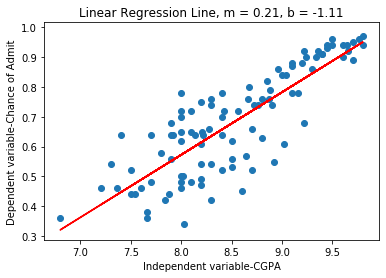

In [20]:
calculate_slope_intercept(x, y)
show_least_squares_line('Linear Regression Line', 'Dependent variable-Chance of Admit', 
                        'Independent variable-CGPA', x, y)

In [404]:
grad.describe()

,GRE_Score,CGPA,Chance_of_Admit
count,100.000000,100.000000,100.000000
mean,317.830000,8.523200,0.682500
std,12.059662,0.694645,0.175288
min,294.000000,6.800000,0.340000
25%,308.750000,8.000000,0.537500
50%,318.000000,8.410000,0.670000
75%,327.000000,9.100000,0.840000
max,340.000000,9.800000,0.970000


In [405]:
sample_df = grad.sample(frac=0.1, random_state=17)
print(sample_df)

    GRE_Score  CGPA  Chance_of_Admit
71        336  9.76             0.96
28        295  7.20             0.46
9         323  8.60             0.45
4         314  8.21             0.65
73        314  9.04             0.84
34        331  9.80             0.94
94        303  7.66             0.36
92        298  8.03             0.34
47        339  9.70             0.89
37        300  7.80             0.58


In [406]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=2)
sns.set_style('whitegrid')

In [407]:
x1s=grad.GRE_Score
x2s=grad.CGPA
ys=grad.Chance_of_Admit
x1 = np.array(x1s)
x2 = np.array(x2s)
y  = np.array(ys)

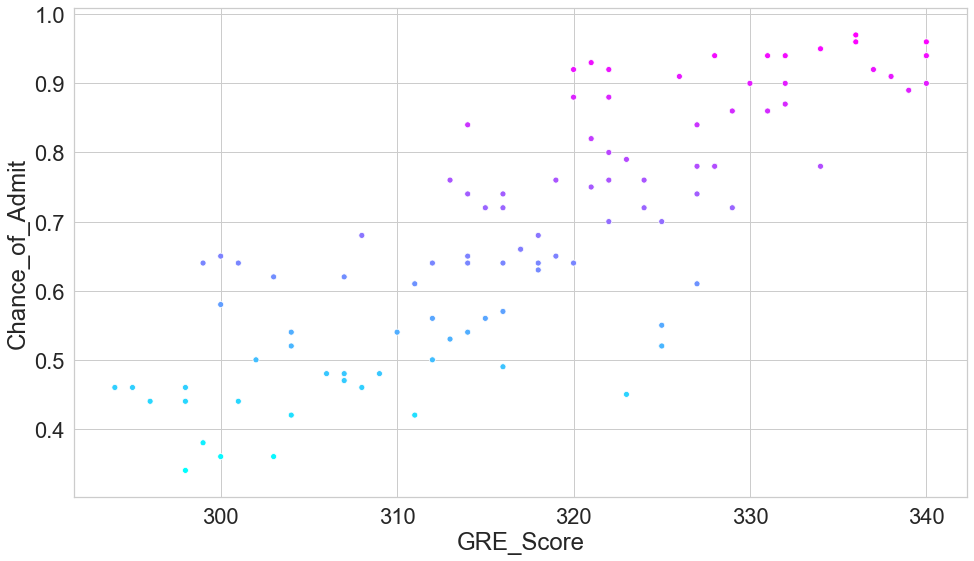

In [408]:
plt.figure(figsize=(16, 9))
sns.scatterplot(data=sample_df, x=x1s, y=ys, hue=ys, 
palette='cool', legend=False)

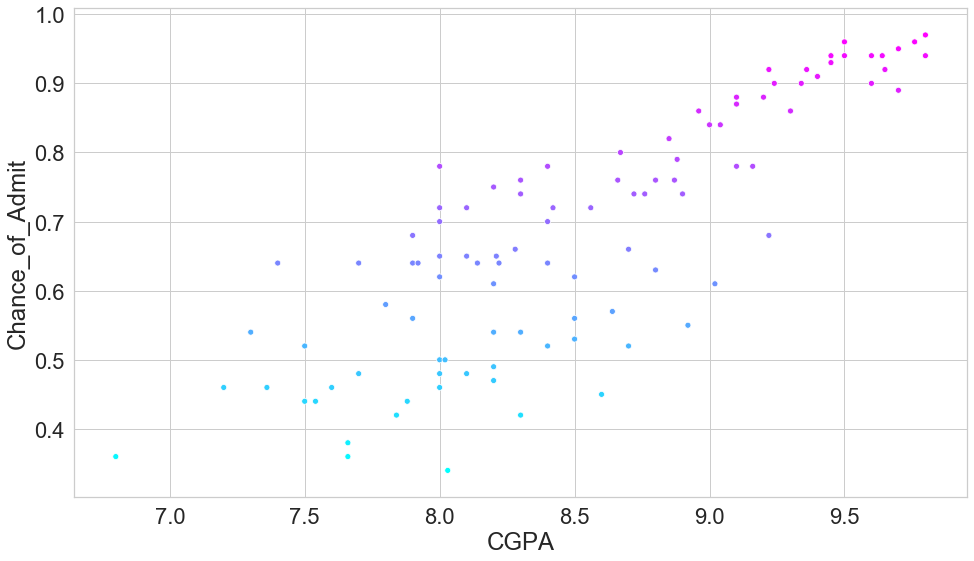

In [409]:
plt.figure(figsize=(16, 9))
sns.scatterplot(data=sample_df, x=x2s, y=ys, hue=ys, 
palette='cool', legend=False)

In [410]:
data=pd.concat([grad.GRE_Score,grad.CGPA],axis=1)
print(data)



    GRE_Score  CGPA
0         337  9.65
1         324  8.87
2         316  8.00
3         322  8.67
4         314  8.21
..        ...   ...
95        304  7.84
96        306  8.00
97        331  8.96
98        332  9.24
99        323  8.88

[100 rows x 2 columns]


In [411]:
x_1_2_list= data.to_numpy().tolist()
print(listDF)
x_1_2=np.array(x_1_2_list)

[[337.0, 9.65], [324.0, 8.87], [316.0, 8.0], [322.0, 8.67], [314.0, 8.21], [330.0, 9.34], [321.0, 8.2], [308.0, 7.9], [302.0, 8.0], [323.0, 8.6], [325.0, 8.4], [327.0, 9.0], [328.0, 9.1], [307.0, 8.0], [311.0, 8.2], [314.0, 8.3], [317.0, 8.7], [319.0, 8.0], [318.0, 8.8], [303.0, 8.5], [312.0, 7.9], [325.0, 8.4], [328.0, 9.5], [334.0, 9.7], [336.0, 9.8], [340.0, 9.6], [322.0, 8.8], [298.0, 7.5], [295.0, 7.2], [310.0, 7.3], [300.0, 8.1], [327.0, 8.3], [338.0, 9.4], [340.0, 9.6], [331.0, 9.8], [320.0, 9.2], [299.0, 8.4], [300.0, 7.8], [304.0, 7.5], [307.0, 7.7], [308.0, 8.0], [316.0, 8.2], [313.0, 8.5], [332.0, 9.1], [326.0, 9.4], [322.0, 9.1], [329.0, 9.3], [339.0, 9.7], [321.0, 8.85], [327.0, 8.4], [313.0, 8.3], [312.0, 7.9], [334.0, 8.0], [324.0, 8.1], [322.0, 8.0], [320.0, 7.7], [316.0, 7.4], [298.0, 7.6], [300.0, 6.8], [311.0, 8.3], [309.0, 8.1], [307.0, 8.2], [304.0, 8.2], [315.0, 8.5], [325.0, 8.7], [325.0, 8.92], [327.0, 9.02], [316.0, 8.64], [318.0, 9.22], [328.0, 9.16], [332.0, 

In [412]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(x_1_2, y, random_state=11)

print(f'Shape of training set = {X_train.shape}')
print(f'Shape of testing  set = {X_test.shape}')

Shape of training set = (75, 2)
Shape of testing  set = (25, 2)


In [413]:
grad_names=["GRE_Score","CGPA"]
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)

for i, name in enumerate(grad_names):
    print(f'{name:>11}: {linear_regression.coef_[i]:24.20f}')

print()
print(f'y-intercept: {linear_regression.intercept_:23.20f}')

  GRE_Score:   0.00578895413315291645
       CGPA:   0.13055722835053013009

y-intercept: -2.27611647898188040884


In [414]:
import math
from sklearn import metrics

predicted = linear_regression.predict(X_test)
expected  = y_test

r2 = metrics.r2_score(expected, predicted)
r  = math.sqrt(r2)

print(f'coefficient of determination = {r2:.1f}')
print(f'     correlation coefficient = {r:.1f}')

coefficient of determination = 0.8
     correlation coefficient = 0.9


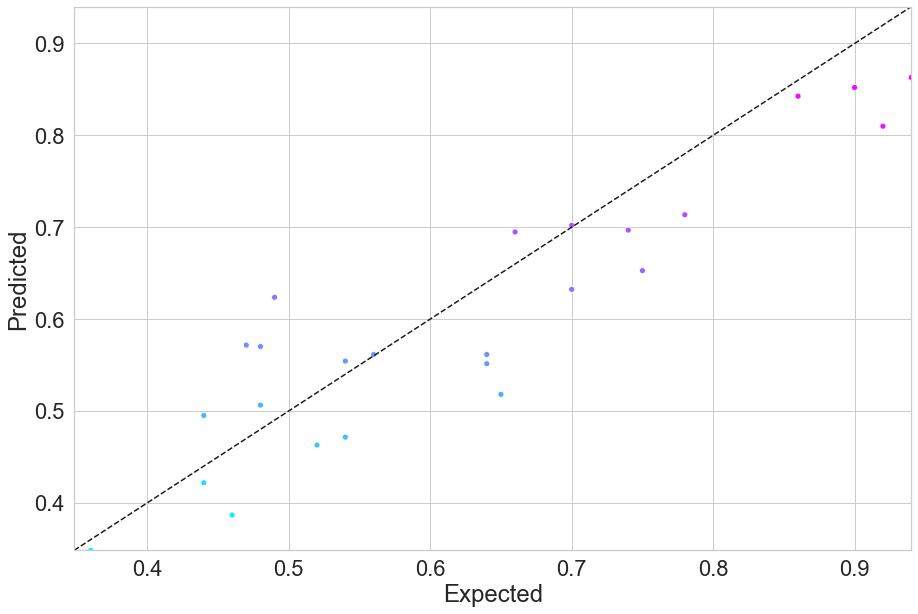

In [415]:
df = pd.DataFrame()

df['Expected']  = pd.Series(expected)
df['Predicted'] = pd.Series(predicted)

figure = plt.figure(figsize=(15, 10))

axes = sns.scatterplot(data=df, x='Expected', y='Predicted', 
                       hue='Predicted', palette='cool', 
                       legend=False)

start = min(expected.min(), predicted.min())
end   = max(expected.max(), predicted.max())

axes.set_xlim(start, end)
axes.set_ylim(start, end)

line = plt.plot([start, end], [start, end], 'k--')